### Building the Image Dataset

In [23]:
import os

train_positive_dir = os.path.join('train/PNEUMONIA')

train_negative_dir = os.path.join('train/NORMAL')

valid_positive_dir = os.path.join('test/PNEUMONIA')

valid_negative_dir = os.path.join('test/NORMAL')

Now, let's see what the filenames look like in the `positive` and `negative` training directories:

In [24]:
train_positive_names = os.listdir(train_positive_dir)
print(train_positive_names[:10])

train_negative_names = os.listdir(train_negative_dir)
print(train_negative_names[:10])

validation_positive_names = os.listdir(valid_positive_dir)
print(validation_positive_names[:10])

validation_negative_names = os.listdir(valid_negative_dir)
print(validation_negative_names[:10])

['BACTERIA-4038442-0001.jpeg', 'BACTERIA-8034950-0011.jpeg', 'BACTERIA-292199-0002.jpeg', 'BACTERIA-2092977-0003.jpeg', 'BACTERIA-4407438-0002.jpeg', 'BACTERIA-8093423-0001.jpeg', 'BACTERIA-880930-0002.jpeg', 'VIRUS-3443773-0006.jpeg', 'BACTERIA-9072988-0002.jpeg', 'VIRUS-9674936-0007.jpeg']
['NORMAL-2552119-0002.jpeg', 'NORMAL-7298141-0001.jpeg', 'NORMAL-3411116-0002.jpeg', 'NORMAL-1619233-0001.jpeg', 'NORMAL-7327513-0001.jpeg', 'NORMAL-2699389-0001.jpeg', 'NORMAL-3781678-0001.jpeg', 'NORMAL-8648239-0002.jpeg', 'NORMAL-5728847-0001.jpeg', 'NORMAL-6881695-0001.jpeg']
['VIRUS-2040583-0001.jpeg', 'VIRUS-9671740-0001.jpeg', 'BACTERIA-4059589-0003.jpeg', 'BACTERIA-5141192-0002.jpeg', 'VIRUS-3225323-0001.jpeg', 'BACTERIA-8190872-0004.jpeg', 'BACTERIA-4322734-0002.jpeg', 'BACTERIA-4376803-0001.jpeg', 'VIRUS-6076183-0001.jpeg', 'BACTERIA-821920-0001.jpeg']
['NORMAL-8698006-0001.jpeg', 'NORMAL-5083836-0001.jpeg', 'NORMAL-5789014-0001.jpeg', 'NORMAL-4196521-0001.jpeg', 'NORMAL-6503977-0001.jpeg

Let's find out the total number of positive and negative images in the directories:

In [25]:
print('total training positive images:', len(os.listdir(train_positive_dir)))
print('total training negative images:', len(os.listdir(train_negative_dir)))
print('total validation positive images:', len(os.listdir(valid_positive_dir)))
print('total validation negative images:', len(os.listdir(valid_negative_dir)))

total training positive images: 3884
total training negative images: 1349
total validation positive images: 390
total validation negative images: 235


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 negative and 8 positive pictures. You can rerun the cell to see a fresh batch each time:

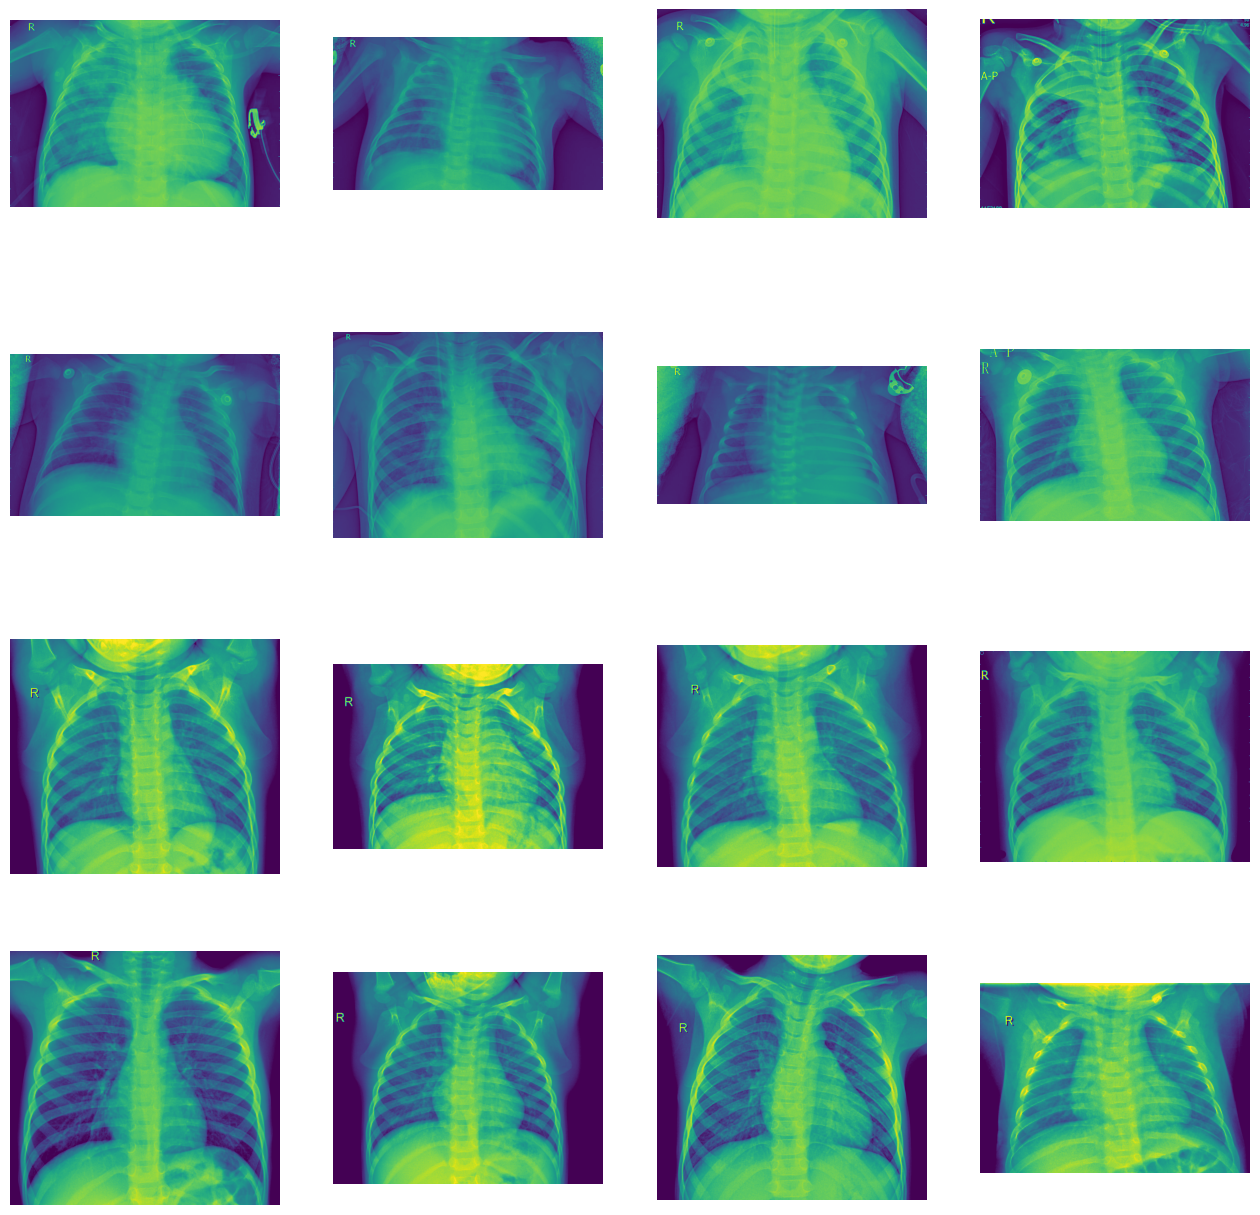

In [27]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_positive_pic = [os.path.join(train_positive_dir, fname)
                for fname in train_positive_names[pic_index-8:pic_index]]
next_negative_pic = [os.path.join(train_negative_dir, fname)
                for fname in train_negative_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_positive_pic + next_negative_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [28]:
from keras_preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        classes = ['PNEUMONIA', 'NORMAL'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'test',  # This is the source directory for training images
        classes = ['PNEUMONIA', 'NORMAL'],
        target_size = (200, 200),  # All images will be resized to 200x200
        batch_size = 19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Building the Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [29]:
import tensorflow as tf

Let's then add a Flatten layer that flattens the input image, which then feeds into the next layer, a Dense layer, or fully-connected layer, with 128 hidden units. Finally, because our goal is to perform binary classification, our final layer will be a sigmoid, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1

In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

The model.summary() method call prints a summary of the NN 

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               15360128  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [32]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training

In [33]:
History = model.fit(train_generator,
      steps_per_epoch=2,
      epochs=20,
      validation_data = validation_generator,
      validation_steps= 10)

Epoch 1/20
2/2 [==============================] - 5s 3s/step - loss: 36.4918 - accuracy: 0.4917 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 4s 3s/step - loss: 42.6693 - accuracy: 0.7708 - val_loss: 1.9672e-07 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 29.5634 - accuracy: 0.5573 - val_loss: 63.4337 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 4s 3s/step - loss: 27.9851 - accuracy: 0.3750 - val_loss: 9.3032e-25 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 26.5689 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 4s 3s/step - loss: 49.4114 - accuracy: 0.7083 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 4s 3s/step - loss: 44.3787 - accuracy: 0.7208 - val_loss: 1.5149e-37 - val_accuracy: 1.0000
Epoch

Save the model

Note: to load model on raspberry pi see: https://www.tensorflow.org/tutorials/keras/save_and_load

"Reload a fresh Keras model from the saved model:

new_model = tf.keras.models.load_model('saved_model/my_model') 

..."

In [34]:
!mkdir -p saved_model
model.save('saved_model/my_model')


INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Accuracy



Let's evaluate the accuracy of our model:

In [35]:
model.evaluate(validation_generator)

33/33 [==============================] - 8s 253ms/step - loss: 5.5557 - accuracy: 0.6859


[5.555676460266113, 0.6858974099159241]